In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from numpy.linalg import lstsq

In [2]:
from clau_genetic_programming import *

################################################################
################################################################
                     Apple
################################################################
################################################################


C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


################################################################
################################################################
                     Brocoli
################################################################
################################################################


C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


################################################################
################################################################
                     Leek
################################################################
################################################################


C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


################################################################
################################################################
                     Mushroom
################################################################
################################################################


C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\cnsanchez\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


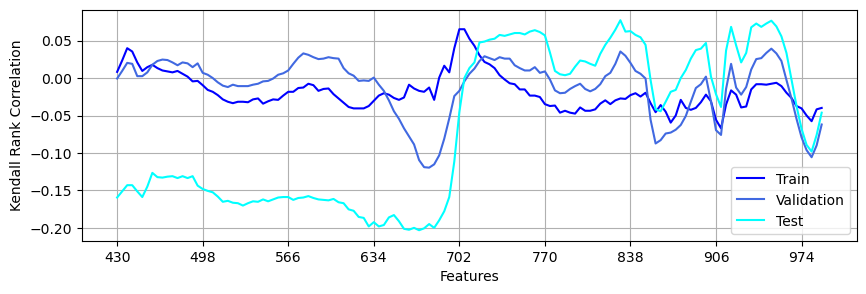

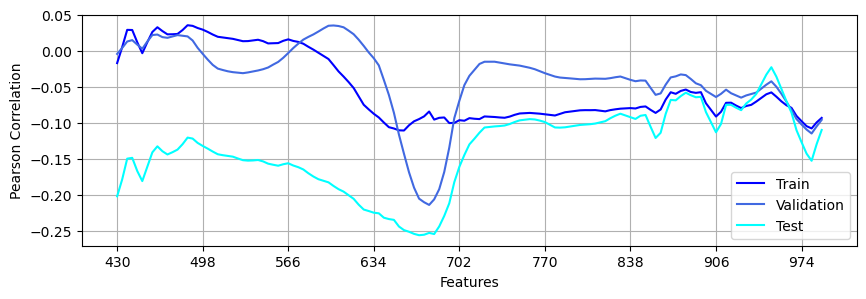

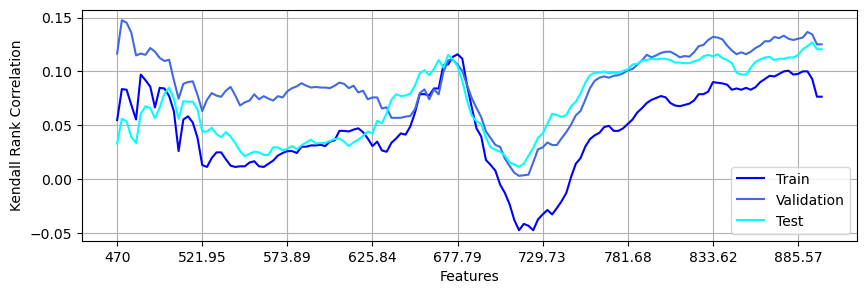

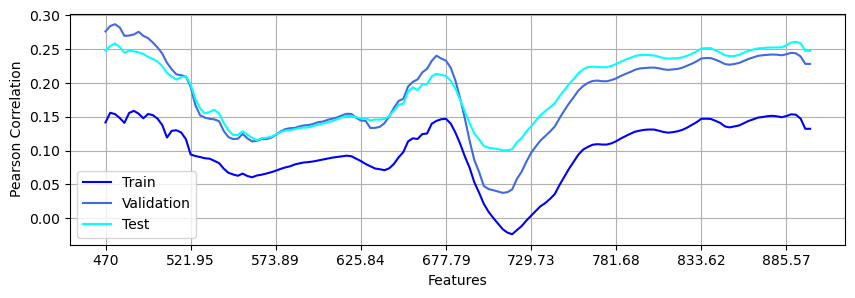

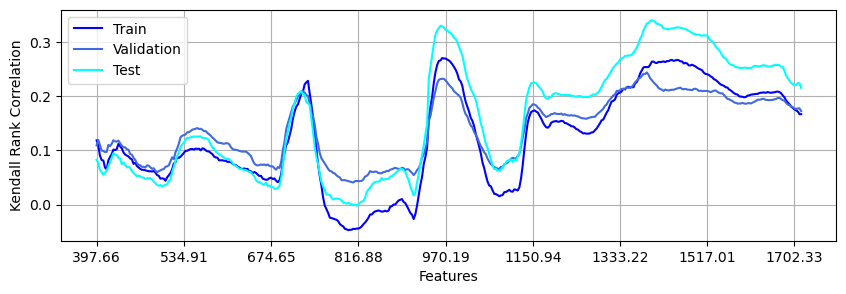

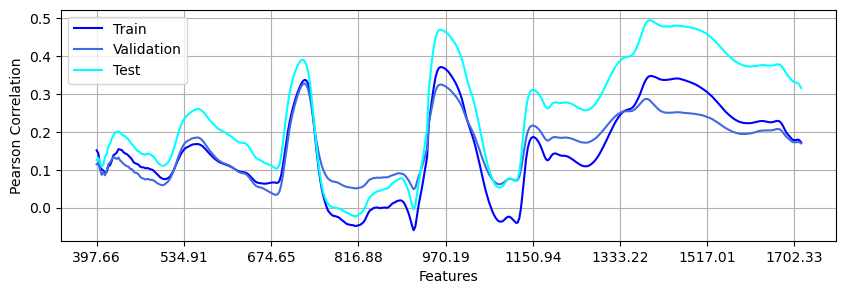

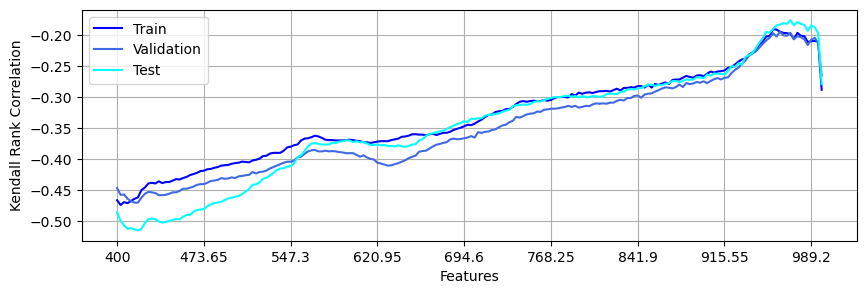

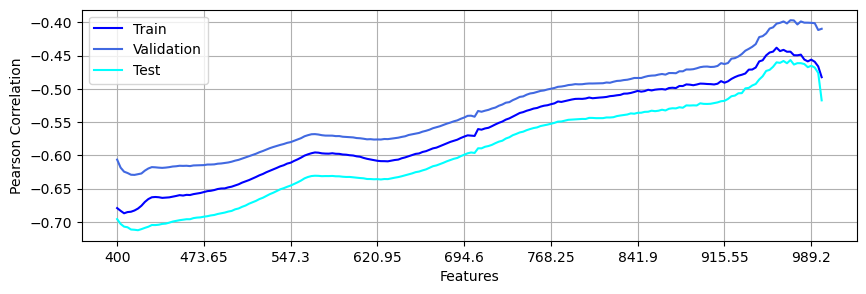

In [3]:
datasets = ['Apple','Brocoli','Leek','Mushroom']
fdataset = open('res/datasets.csv','w')
fdataset.write('Dataset,Features,Samples,Train,Validation,Test\n')
fdataset.close()
for dataset in datasets: 
    print('################################################################')
    print('################################################################')
    print('                    ',dataset)
    print('################################################################')
    print('################################################################')
    df = pandas.read_csv('datasets/'+dataset+'.csv')
    Y = df.values[:,1]
    X = df.values[:,2:]
    features = df.columns[2:]
    Xtv, Xtest, Ytv, Ytest = train_test_split(X,Y, test_size=0.33, random_state=0, shuffle=True)
    Xtrain, Xval, Ytrain, Yval = train_test_split(Xtv,Ytv, test_size=0.5, random_state=0, shuffle=True)

    fdataset = open('res/datasets.csv','a')
    fdataset.write(dataset+","+str(X.shape[1])+","+str(X.shape[0])+",")
    fdataset.write(str(Xtrain.shape[0])+","+str(Xval.shape[0])+","+str(Xtest.shape[0])+"\n")
    fdataset.close()

    vpearson = np.zeros((len(features),3))
    vkendall = np.zeros((len(features),3))
    for f,feature in enumerate(features):
        vkendall[f,0] = kendalltau(Ytrain.astype(float).flatten(),Xtrain[:,f].astype(float).flatten())[0]
        vpearson[f,0] = np.corrcoef(Ytrain.astype(float).flatten(),Xtrain[:,f].astype(float).flatten())[0,1]
        vkendall[f,1] = kendalltau(Yval.astype(float).flatten(),Xval[:,f].astype(float).flatten())[0]
        vpearson[f,1] = np.corrcoef(Yval.astype(float).flatten(),Xval[:,f].astype(float).flatten())[0,1]
        vkendall[f,2] = kendalltau(Ytest.astype(float).flatten(),Xtest[:,f].astype(float).flatten())[0]
        vpearson[f,2] = np.corrcoef(Ytest.astype(float).flatten(),Xtest[:,f].astype(float).flatten())[0,1]

    fres = open('res/res_'+dataset+'.csv','w')
    fres.write('Coefficient,Dataset,Value,Individual\n')
    idx = np.argmax( np.abs(vkendall[:,0]) )
    fres.write('Kendall,Train,'+str(vkendall[idx,0])+","+features[idx]+"\n")
    idx = np.argmax( np.abs(vkendall[:,1]) )
    fres.write('Kendall,Val,'+str(vkendall[idx,1])+","+features[idx]+"\n")
    idx = np.argmax( np.abs(vkendall[:,2]) )
    fres.write('Kendall,Test,'+str(vkendall[idx,2])+","+features[idx]+"\n")
    idx = np.argmax( np.abs(vpearson[:,0]) )
    fres.write('Pearson,Train,'+str(vpearson[idx,0])+","+features[idx]+"\n")
    idx = np.argmax( np.abs(vpearson[:,1]) )
    fres.write('Pearson,Val,'+str(vpearson[idx,1])+","+features[idx]+"\n")
    idx = np.argmax( np.abs(vpearson[:,2]) )
    fres.write('Pearson,Test,'+str(vpearson[idx,2])+","+features[idx]+"\n")
    fres.close()
                
    vinc = int(len(features)/8)
    vx = np.arange(0,len(features),vinc)
    plt.figure(figsize=(10,3))
    plt.subplot(1,1,1)
    plt.plot(vkendall[:,0],c='blue',label='Train')
    plt.plot(vkendall[:,1],c='royalblue',label='Validation')
    plt.plot(vkendall[:,2],c='aqua',label='Test')
    plt.xticks(vx,features[vx])
    plt.ylabel('Kendall Rank Correlation')
    plt.xlabel('Features')
    plt.grid()
    plt.legend()
    plt.savefig('res/'+dataset+"_kendall.png")
    plt.figure(figsize=(10,3))
    plt.subplot(1,1,1)
    plt.plot(vpearson[:,0],c='blue',label='Train')
    plt.plot(vpearson[:,1],c='royalblue',label='Validation')
    plt.plot(vpearson[:,2],c='aqua',label='Test')
    plt.xticks(vx,features[vx])
    plt.ylabel('Pearson Correlation')
    plt.xlabel('Features')
    plt.grid()
    plt.legend()
    plt.savefig('res/'+dataset+"_pearson.png")

    for coef in ['Kendall','Pearson']:
        if coef=='Kendall':
            idx = np.argsort(np.abs(vkendall[:,0]))[-5:]
        else:
            idx = np.argsort(np.abs(vpearson[:,0]))[-5:]

        variables = list(np.arange(1,Xtrain.shape[1],10) )
        variables.extend( list(idx) )
        variables = np.array(variables)
        XXtrain = Xtrain[:,variables]
        XXtest = Xtest[:,variables]
        XXval = Xval[:,variables]
        Xfeatures = features[variables]

        model = GeneticProgramming(features,popsize=100,maxGenerations=50,valFitness=coef)
        #model = GeneticProgramming(features,popsize=10,maxGenerations=5,valFitness=coef)
        indElite1,indElite2,indElite3 = model.fit(Xtrain,Ytrain,Xval,Yval)
        
        fres = open('res/res_'+dataset+'_'+coef+'.csv','w')
        fres.write('IndividualSize,Coefficient,Dataset,Value,Individual\n')
        fres.write('1,Kendall,Train,'+str(model.indElite1.calculate_kendall(Xtrain,Ytrain))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Kendall,Train,'+str(model.indElite2.calculate_kendall(Xtrain,Ytrain))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Kendall,Train,'+str(model.indElite3.calculate_kendall(Xtrain,Ytrain))+","+model.indElite3.__str__()+"\n")
        fres.write('1,Kendall,Val,'+str(model.indElite1.calculate_kendall(Xval,Yval))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Kendall,Val,'+str(model.indElite2.calculate_kendall(Xval,Yval))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Kendall,Val,'+str(model.indElite3.calculate_kendall(Xval,Yval))+","+model.indElite3.__str__()+"\n")
        fres.write('1,Kendall,Test,'+str(model.indElite1.calculate_kendall(Xtest,Ytest))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Kendall,Test,'+str(model.indElite2.calculate_kendall(Xtest,Ytest))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Kendall,Test,'+str(model.indElite3.calculate_kendall(Xtest,Ytest))+","+model.indElite3.__str__()+"\n")
        fres.write('1,Pearson,Train,'+str(model.indElite1.calculate_pearson(Xtrain,Ytrain))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Pearson,Train,'+str(model.indElite2.calculate_pearson(Xtrain,Ytrain))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Pearson,Train,'+str(model.indElite3.calculate_pearson(Xtrain,Ytrain))+","+model.indElite3.__str__()+"\n")
        fres.write('1,Pearson,Val,'+str(model.indElite1.calculate_pearson(Xval,Yval))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Pearson,Val,'+str(model.indElite2.calculate_pearson(Xval,Yval))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Pearson,Val,'+str(model.indElite3.calculate_pearson(Xval,Yval))+","+model.indElite3.__str__()+"\n")
        fres.write('1,Pearson,Test,'+str(model.indElite1.calculate_pearson(Xtest,Ytest))+","+model.indElite1.__str__()+"\n")
        fres.write('2,Pearson,Test,'+str(model.indElite2.calculate_pearson(Xtest,Ytest))+","+model.indElite2.__str__()+"\n")
        fres.write('3,Pearson,Test,'+str(model.indElite3.calculate_pearson(Xtest,Ytest))+","+model.indElite3.__str__()+"\n")
        fres.close()